In [1]:
import numpy as np
import pandas as pd

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('kyphosis.csv')

In [5]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


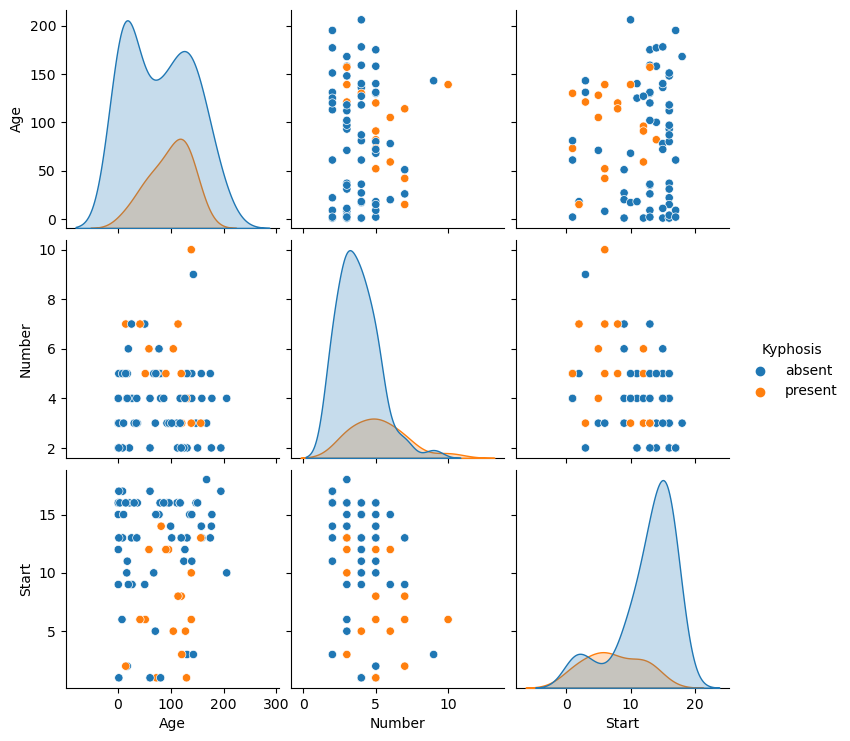

In [8]:
sns.pairplot(df, hue='Kyphosis')

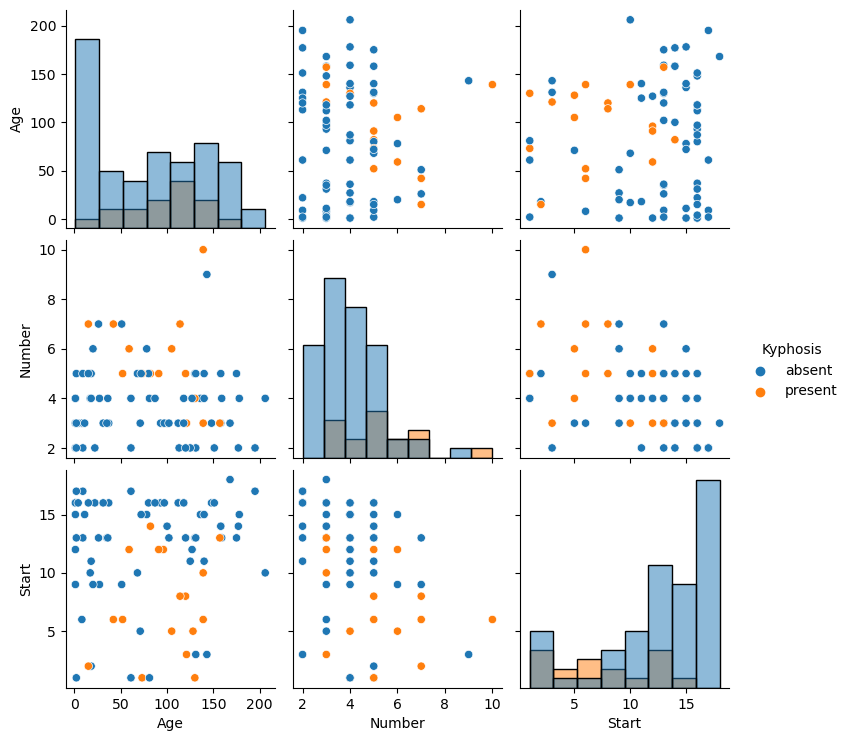

In [10]:
sns.pairplot(df, hue='Kyphosis', diag_kind='hist')

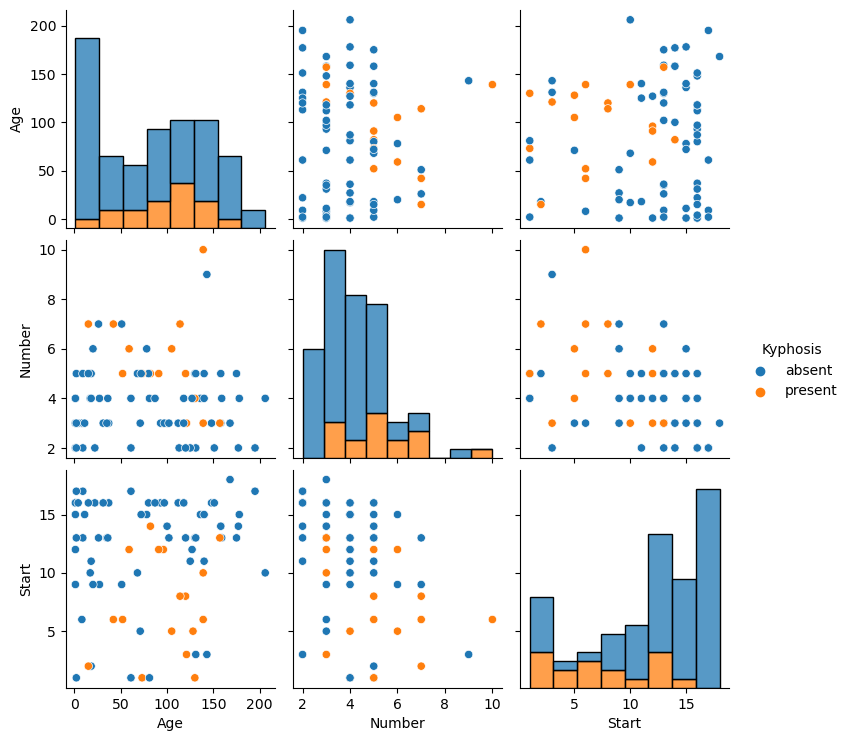

In [12]:
sns.pairplot(df, hue='Kyphosis', diag_kind='hist', diag_kws={'multiple': 'stack'})

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Training Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dtree = DecisionTreeClassifier()

In [27]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
predictions = dtree.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
print(confusion_matrix(y_test, predictions))
print("\n")
print(classification_report(y_test, predictions))

[[16  3]
 [ 4  2]]


              precision    recall  f1-score   support

      absent       0.80      0.84      0.82        19
     present       0.40      0.33      0.36         6

    accuracy                           0.72        25
   macro avg       0.60      0.59      0.59        25
weighted avg       0.70      0.72      0.71        25



# Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rfc = RandomForestClassifier(n_estimators=200) # as our dataset is quite small this estimators will be fine

In [34]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [35]:
rfc_pred = rfc.predict(X_test)

In [37]:
print(confusion_matrix(y_test, rfc_pred))
print("\n")
print(classification_report(y_test, rfc_pred))

[[19  0]
 [ 5  1]]


              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        19
     present       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



In [40]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

# Visualization of sklearn for Decision Tree
* this is not complete (optional)

In [52]:
!pip install pydot
!pip install graphviz

from IPython.display import Image
# from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [53]:
dot_data = StirngIO()
export_graphviz(dtree, out_file = dot_data, feature_names = features, filled= True, rounded=True,  
                special_characters=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png)

NameError: name 'StirngIO' is not defined